In [209]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from skimage import measure

In [210]:
width, height = 14, 14

SHAPE_DATA = ["vertical_ellipse", "horizontal_ellipse", "heart", "circle", "hexagon"]

isoval_boundaries = {
"vertical_ellipse" : (1,7),
"horizontal_ellipse" : (1,7),
"heart" : (5,135),
"circle" : (25,169),
"hexagon" : (5,12)
}

In [211]:
def shape(name, x,y):
    if name == "heart":
        return (x**2 + (y - np.sqrt(np.abs(x))) ** 2)
    elif name == "circle" or name == "hexagon":  #hexagon and circle share the same implicit function
        return x**2 + y**2
    elif name == "vertical_ellipse":
        x = (x - 5)**2 / 9
        y = (y + 1)**2 / 16
        return x + y
    elif name == "horizontal_ellipse":
        x = (x + 1)**2 / 16
        y = (y - 5)**2 / 9
        return x + y

In [212]:
def generate_shape(shape_name, sample_size, persistent_save=False):
    a = []
    for w in range(-width,width):
        for h in range(-height,height):
            a.append(shape(shape_name,h,w))
    
    np_arr = np.array(a).reshape(width * 2, height * 2)
    
    isoval_bounds = isoval_boundaries[shape_name]
    boundary_pool = [bounds for bounds in range(isoval_bounds[0], isoval_bounds[1])]
    
    contours = []
    
    if sample_size > len(boundary_pool):
        isovals = []
        for i in range(sample_size):
            isovals.append(random.randint(isoval_bounds[0], isoval_bounds[1]))
    else:
        isovals = random.sample(boundary_pool, sample_size)
    
    for isoval in isovals:
        sample = measure.find_contours(np_arr, isoval)
        contours.append(sample)
     
    if (persistent_save):
        np.savez("dataset/" + str(shape_name) + ".npz", np.array(contours, dtype='object'))
        
    return contours

In [241]:
def gen_uniform_dataset(samples_size, save_csv = False):
    df = pd.DataFrame(columns = SHAPE_DATA)
    for shape in SHAPE_DATA:
        df[shape] = generate_shape(shape, 100, persistent_save=False)
    
    if (save_csv):
        df.to_pickle('dataset/shape_data.pkl')
    return df

In [242]:
df = gen_uniform_dataset(100, True)

In [245]:
df = pd.read_pickle('dataset/shape_data.pkl')

,vertical_ellipse,horizontal_ellipse,heart,circle,hexagon
0,"[[[19.0, 21.55], [18.636363636363637, 22.0], [...","[[[26.0, 17.987654320987655], [25.995192307692...","[[[16.0, 16.138909436713128], [15.0, 16.154432...","[[[23.0, 17.428571428571427], [22.764705882352...","[[[17.0, 15.666666666666666], [16.8, 16.0], [1..."
1,"[[[22.0, 21.8875], [21.941176470588236, 22.0],...","[[[24.0, 17.395061728395063], [23.659722222222...","[[[22.0, 17.461324865405185], [21.818181818181...","[[[24.0, 16.4], [23.842105263157894, 17.0], [2...","[[[16.0, 15.0], [15.0, 16.0], [14.0, 16.2], [1..."
2,"[[[16.0, 20.979166666666668], [15.977777777777...","[[[26.0, 17.987654320987655], [25.995192307692...","[[[25.0, 19.710977926270115], [24.868876282911...","[[[26.0, 18.77777777777778], [25.9130434782608...","[[[16.0, 16.2], [15.0, 16.8], [14.0, 17.0], [1..."
3,"[[[21.0, 22.0], [20.17037037037037, 23.0], [20...","[[[24.0, 17.395061728395063], [23.659722222222...","[[[23.0, 19.275693926191597], [22.511678818918...","[[[23.0, 18.22222222222222], [22.5882352941176...","[[[17.0, 15.666666666666666], [16.8, 16.0], [1..."
4,"[[[21.0, 22.0], [20.17037037037037, 23.0], [20...","[[[24.0, 17.395061728395063], [23.659722222222...","[[[25.0, 20.401639716955117], [24.631188711611...","[[[20.0, 16.0], [19.545454545454547, 17.0], [1...","[[[17.0, 15.666666666666666], [16.8, 16.0], [1..."
...,...,...,...,...,...
95,"[[[18.0, 20.979166666666664], [17.987654320987...","[[[26.0, 17.987654320987655], [25.995192307692...","[[[25.0, 20.504921543492802], [24.694848524255...","[[[22.0, 15.0], [21.8, 16.0], [21.466666666666...","[[[16.0, 15.0], [15.0, 16.0], [14.0, 16.2], [1..."
96,"[[[19.0, 21.55], [18.636363636363637, 22.0], [...","[[[26.0, 15.977777777777778], [25.995192307692...","[[[17.0, 16.607206358681918], [16.0, 16.984816...","[[[24.0, 18.444444444444443], [23.736842105263...","[[[17.0, 15.666666666666666], [16.8, 16.0], [1..."
97,"[[[19.0, 21.55], [18.636363636363637, 22.0], [...","[[[23.0, 14.851851851851853], [22.964285714285...","[[[22.0, 18.482089386198325], [21.693868352951...","[[[24.0, 16.6], [23.894736842105264, 17.0], [2...","[[[16.0, 16.0], [15.0, 16.6], [14.0, 16.8], [1..."
98,"[[[20.0, 21.8875], [19.923076923076923, 22.0],...","[[[25.0, 17.0], [24.539772727272727, 18.0], [2...","[[[19.0, 16.404779016466378], [18.696617999906...","[[[24.0, 17.428571428571427], [23.789473684210...","[[[17.0, 15.666666666666666], [16.8, 16.0], [1..."


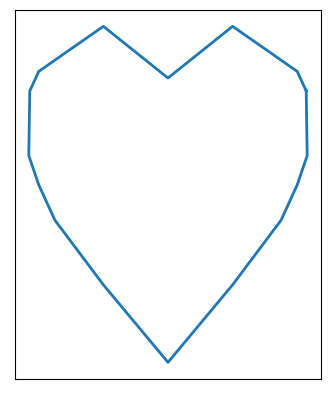

In [244]:
contours = df['heart'][0]
fig, ax = plt.subplots()

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])

plt.show()